In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [7]:
df = pd.read_csv('data/intervals.csv', nrows=500)

In [8]:
df.tail()

,Unnamed: 0,interval,origindex,timestamp,uniquename
495,495,895.0,187336.0,2018-09-16 09:52:02,1000-1
496,496,905.0,187817.0,2018-09-16 10:07:07,1000-1
497,497,899.0,188293.0,2018-09-16 10:22:06,1000-1
498,498,900.0,188785.0,2018-09-16 10:37:06,1000-1
499,499,905.0,189279.0,2018-09-16 10:52:11,1000-1


In [9]:
df.head()

,Unnamed: 0,interval,origindex,timestamp,uniquename
0,0,NaN,NaN,NaN,NaN
1,1,547.0,1419183.0,2018-10-08 13:00:07,1000-0
2,2,841.0,1419804.0,2018-10-08 13:14:08,1000-0
3,3,901.0,1420489.0,2018-10-08 13:29:09,1000-0
4,4,883.0,1421166.0,2018-10-08 13:43:52,1000-0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1159ff8d0>,
      dtype=object)

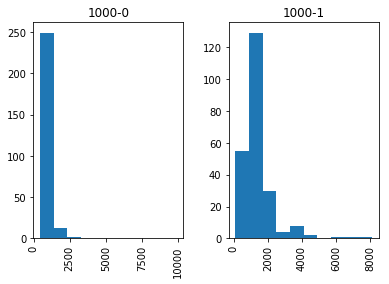

In [10]:
df.hist(column='interval', by='uniquename')